In [1]:
## import packages

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px


# to ignore warning

import warnings
warnings.filterwarnings('ignore')

In [2]:
## import data 

crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#copying original data

data=crop.copy()
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Data fields
* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

In [4]:
data.size #total no. of cells

17600

In [5]:
## shape

print("The Shape of the Dataset is: {}" .format(data.shape))
print("The number of the columns in the Dataset is: {}" .format(data.shape[1]))
print("The Shape of the row in the Dataset is: {}" .format(data.shape[0]))

The Shape of the Dataset is: (2200, 8)
The number of the columns in the Dataset is: 8
The Shape of the row in the Dataset is: 2200


In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
## info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [9]:
#checking for unique values
for i in data.columns:
    print("Column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype=="object"):
        print("Unique values : ",pd.unique(data[i]))

Column Name :  N
No. of unique values : 137 

Column Name :  P
No. of unique values : 117 

Column Name :  K
No. of unique values : 73 

Column Name :  TEMPERATURE
No. of unique values : 2200 

Column Name :  HUMIDITY
No. of unique values : 2200 

Column Name :  PH
No. of unique values : 2200 

Column Name :  RAINFALL
No. of unique values : 2200 

Column Name :  LABEL
No. of unique values : 22 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


##### There are 22 classes in output variable.

In [10]:
# type of data

data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
## count unique values in 'label' columns

data['label'].value_counts()

grapes         100
mungbean       100
maize          100
orange         100
blackgram      100
coffee         100
jute           100
muskmelon      100
rice           100
watermelon     100
papaya         100
cotton         100
mothbeans      100
pomegranate    100
mango          100
chickpea       100
kidneybeans    100
pigeonpeas     100
apple          100
banana         100
lentil         100
coconut        100
Name: label, dtype: int64

In [12]:
## lets check null values

data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Descriptive Statistics

In [13]:
## descripe

data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
#label encoding for output variable
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order
crop['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order

In [15]:
#encoded labels for classes 
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes


,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [16]:
#fetching the label for given encoded value
a=12
for i in range(0,len(classes)):
    if(classes.encoded[i]==a):
        print(classes.index[i].upper())

MANGO


In [17]:
#dropping duplicate values
data =data.drop_duplicates()

In [18]:
corr = data.corr() # Saving Correlation of Dataset in corr variable.
corr # Displaying Correlation 

,N,P,K,temperature,humidity,ph,rainfall,Encoded_label
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.031130
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.491006
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.346417
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.113606
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.193911
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.012253
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.045611
Encoded_label,-0.031130,-0.491006,-0.346417,0.113606,0.193911,-0.012253,0.045611,1.000000


<AxesSubplot:>

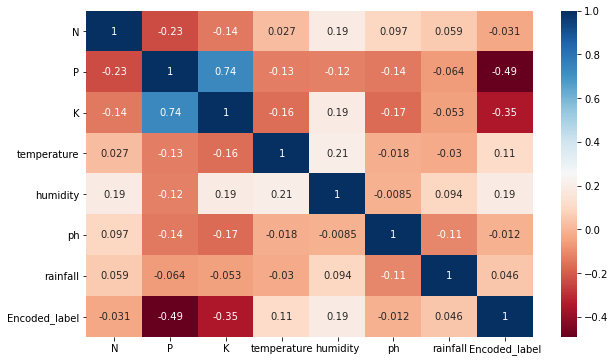

In [19]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

# Outliers Detection and Removal

Variable Name : N


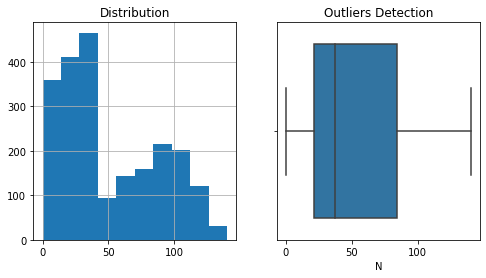



Variable Name : P


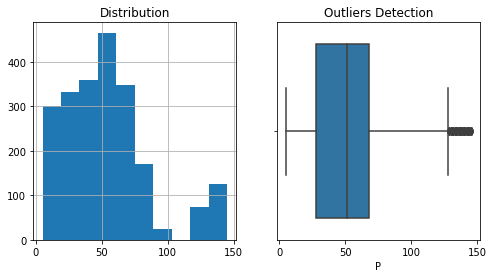



Variable Name : K


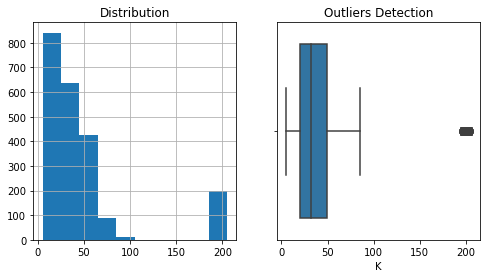



Variable Name : TEMPERATURE


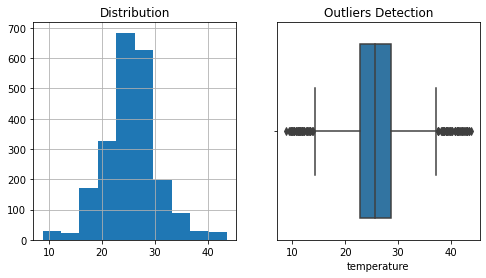



Variable Name : HUMIDITY


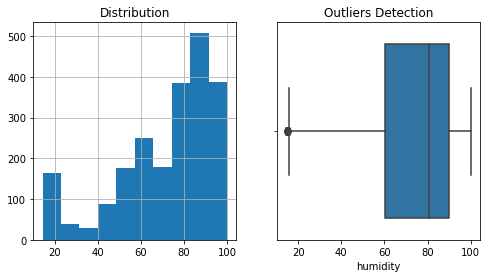



Variable Name : PH


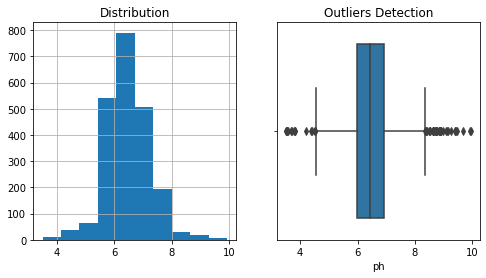



Variable Name : RAINFALL


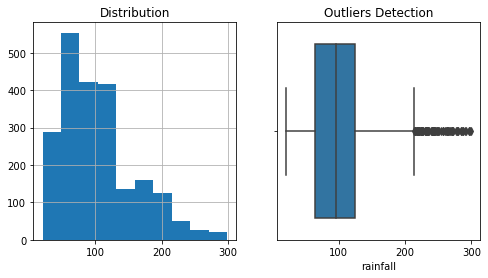

In [20]:
#checking for outliers in the data
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

Variable Name : N


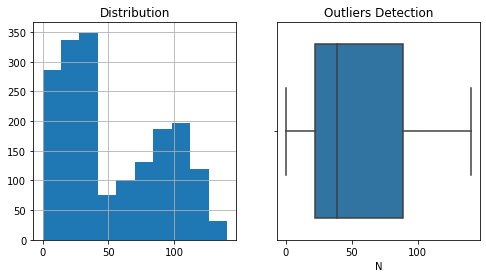



Variable Name : P


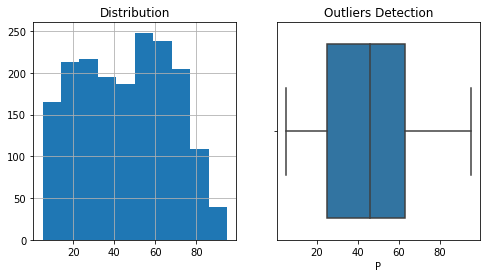



Variable Name : K


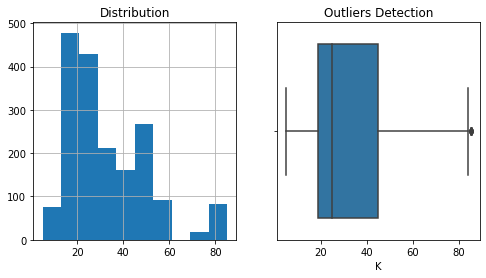



Variable Name : TEMPERATURE


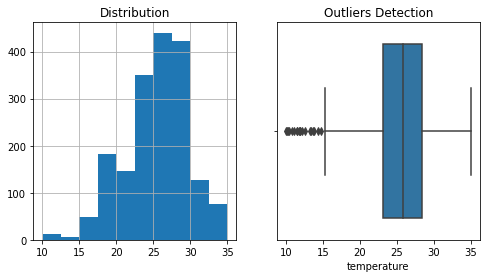



Variable Name : HUMIDITY


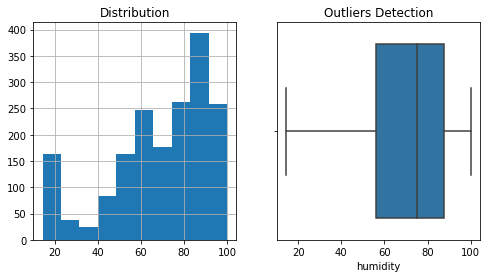



Variable Name : PH


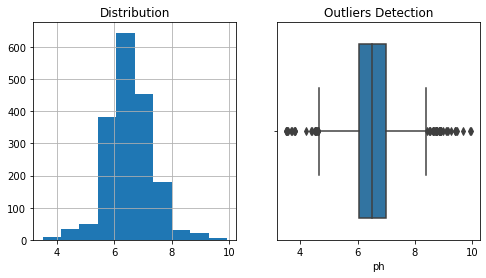



Variable Name : RAINFALL


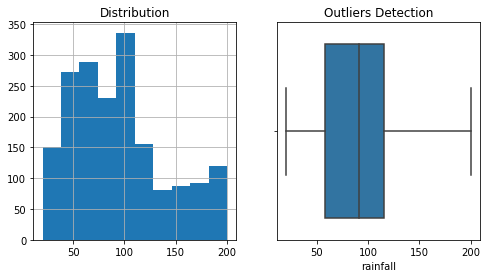

In [21]:
# Removal of Outliers

data = data.loc[data["rainfall"]<200]
data = data.loc[data["temperature"]<35]
data = data.loc[data["P"]<105]
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')

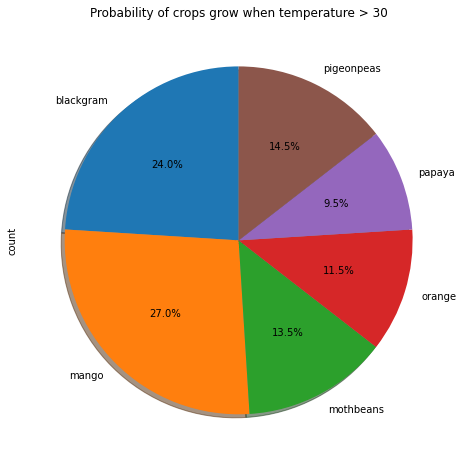

In [22]:
#which crops can grow at higher temperature .i.e., temperature > 30
x = pd.DataFrame(pd.crosstab(data.label[data.temperature > 30],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when temperature > 30')
plt.show()

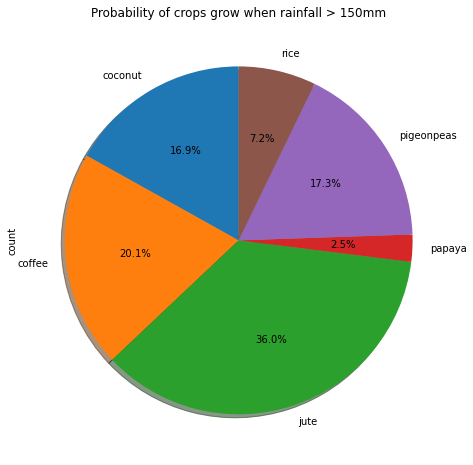

In [23]:

#which crops can grow at higher rainfall .i.e., rainfall > 150mm
x1 = pd.DataFrame(pd.crosstab(data.label[data.rainfall > 150],'count',normalize=True)*100)
x1.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when rainfall > 150mm')
plt.show()

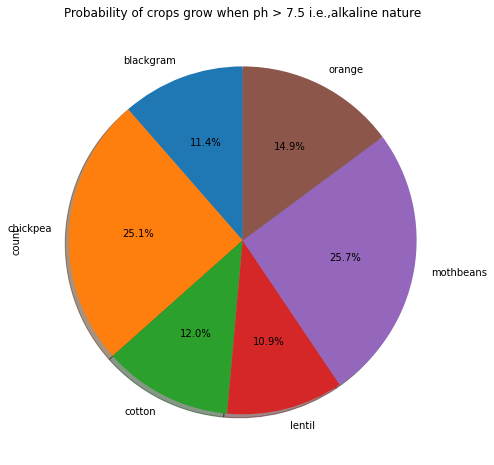

In [24]:
#which crops can grow at higher ph value .i.e., (alkaline nature) ph > 7.5
x = pd.DataFrame(pd.crosstab(data.label[data.ph > 7.5],'count',normalize=True)*100)
x.plot.pie(y = 'count',autopct='%1.1f%%',figsize=(8,8),legend=None,shadow=True, startangle=90)
plt.title('Probability of crops grow when ph > 7.5 i.e.,alkaline nature')
plt.show()

# Seperating features and target label

<AxesSubplot:>

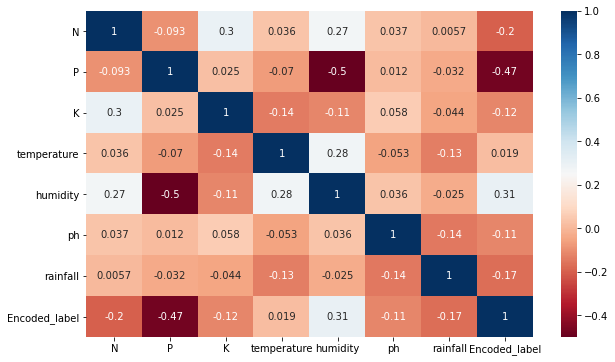

In [25]:
#checking the corelation
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')



In [26]:
#Splitting the data into input and output
x = crop.iloc[:,:-2]
y = crop.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())


Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    20
1    20
2    20
3    20
4    20
Name: Encoded_label, dtype: int64


In [27]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))


Shape of Splitting :
x_train = (1760, 7), x_test = (440, 7), y_train = (1760,), y_test = (440,)


In [28]:
acc=[]
model=[]
pre=[]

# Decision Tree

In [29]:
#importing necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


Confusion Matrix : 



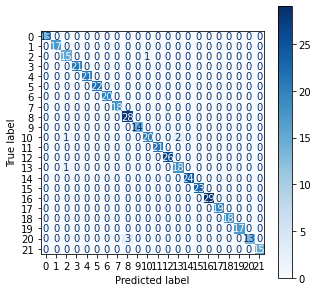

In [30]:
#Initializing the model

d_tree = DecisionTreeClassifier()
pred_d_tree = d_tree.fit(x_train,y_train).predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(5,5))
plot_confusion_matrix(d_tree,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [31]:
#classification report

print('REPORT : \n',classification_report(y_test,pred_d_tree))
acc_d_tree = accuracy_score(y_test,pred_d_tree)

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.88      0.94      0.91        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       0.95      0.87      0.91        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.90      0.95      0.92        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [32]:
x=metrics.accuracy_score(y_test,pred_d_tree)
y=metrics.precision_score(y_test,pred_d_tree,average='weighted')
acc.append(x)
pre.append(y)
model.append("Decision Tree")

# Logistic Regression

In [33]:
#importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


Confusion Matrix : 



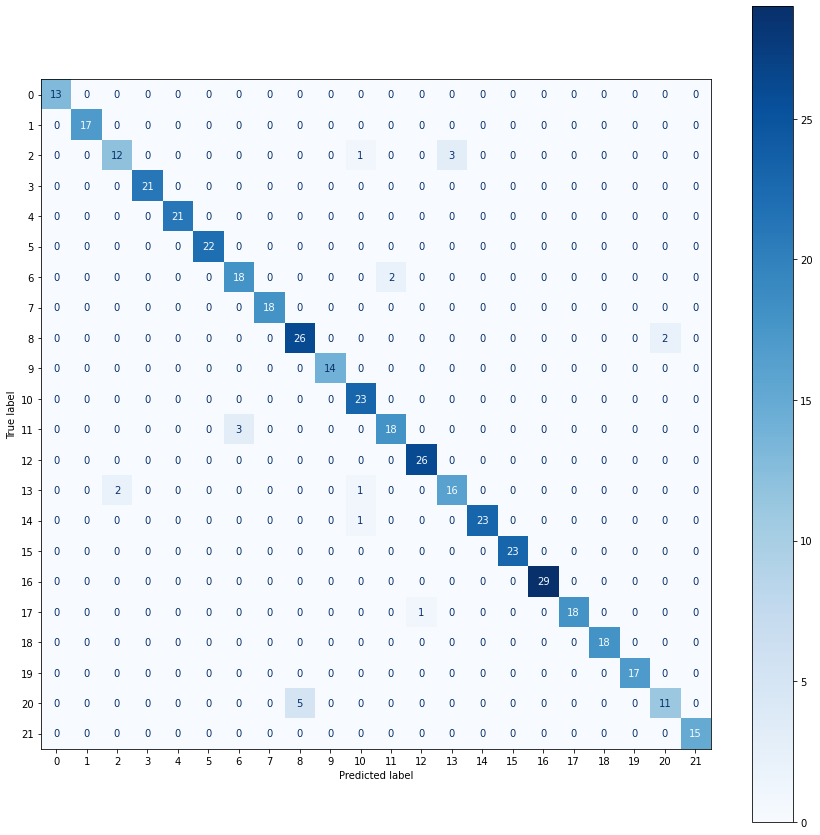

In [34]:
#Initializing the model

logis = LogisticRegression()
pred_logis = logis.fit(x_train,y_train).predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(logis,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()


In [35]:
#classification report

print('REPORT : \n',classification_report(y_test,pred_logis))
acc_logis = accuracy_score(y_test,pred_logis)



REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.86      0.75      0.80        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       0.86      0.90      0.88        20
           7       1.00      1.00      1.00        18
           8       0.84      0.93      0.88        28
           9       1.00      1.00      1.00        14
          10       0.88      1.00      0.94        23
          11       0.90      0.86      0.88        21
          12       0.96      1.00      0.98        26
          13       0.84      0.84      0.84        19
          14       1.00      0.96      0.98        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [36]:
x=metrics.accuracy_score(y_test,pred_logis)
acc.append(x)
y=metrics.precision_score(y_test,pred_logis,average='weighted')
pre.append(y)
model.append("Logistic Regression")

# Random Forest

In [37]:
#importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [38]:
#initializing the model and fitting for train data

rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand


0.9931818181818182

In [39]:
x=metrics.accuracy_score(y_test,pred_rand)
acc.append(x)
y=metrics.precision_score(y_test,pred_rand,average='weighted')
pre.append(y)
model.append("Random Forest")

In [40]:
#selecting parameters using GridSearchCV

param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = GridSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)
grid_rand.fit(x_train,y_train)


Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 40, 10),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [41]:
print(grid_rand.best_params_)
print(grid_rand.best_score_)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 21, 'n_estimators': 40}
0.9971590909090908


Confusion Matrix : 



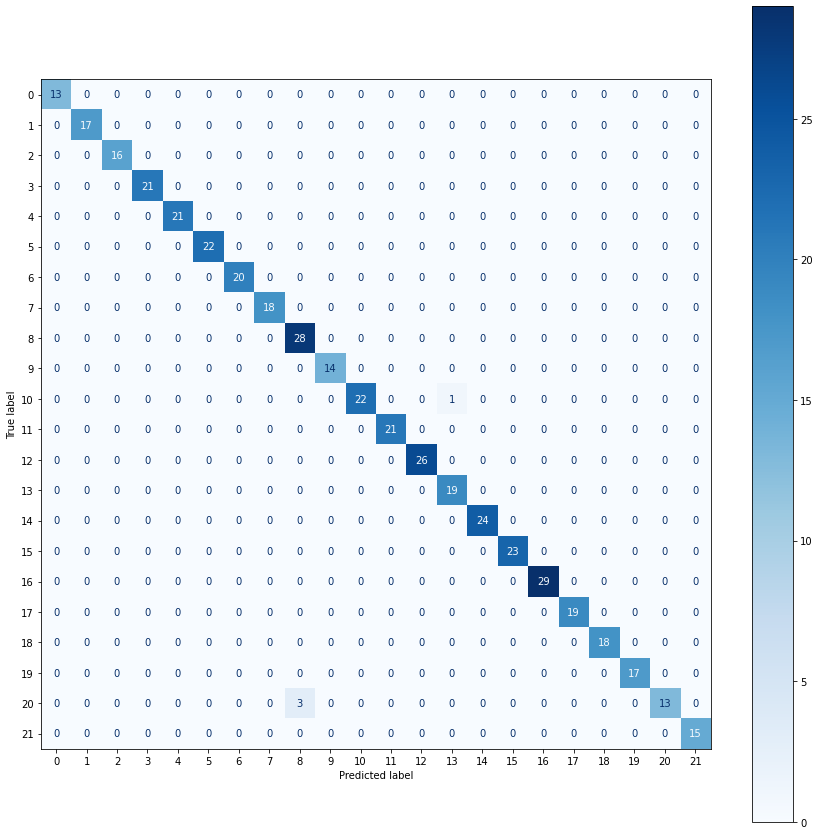

In [42]:

#predicting for test data and plotting confusion matrix
pred_rand = grid_rand.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_rand,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [43]:
#classification report
print('REPORT : \n',classification_report(y_test,pred_rand))


REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      0.96      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.95      1.00      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

# Accuracy Comparison

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

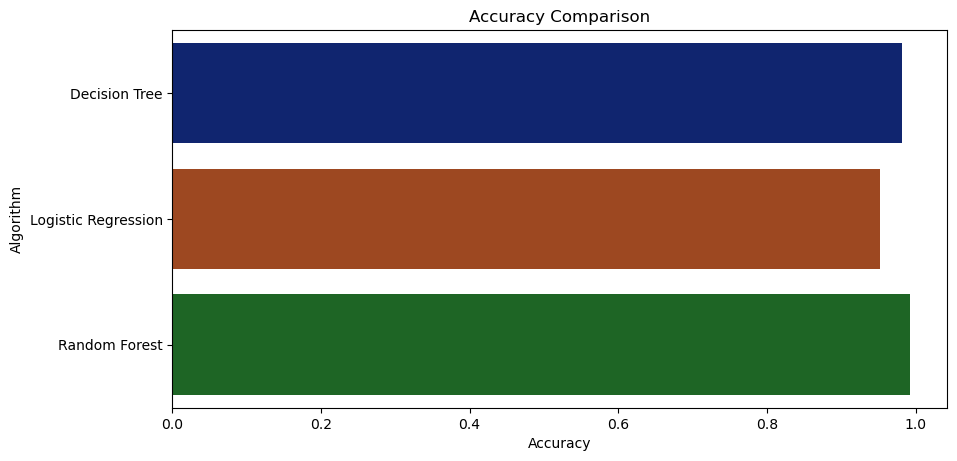

In [44]:
plt.figure(figsize=[10,5],dpi=100)
plt.title("Accuracy Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Algorithm")
sns.barplot(x=acc,y=model,palette="dark")

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Precision'>

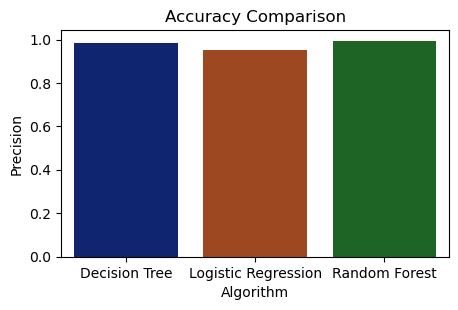

In [45]:
plt.figure(figsize=[5,3],dpi=100)
plt.title("Accuracy Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Precision")
sns.barplot(x=model,y=pre,palette="dark")

In [46]:
#importing pickle file
import pickle
pickle_out = open('classifier.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [47]:

a = [[180,65,140,30,80,7.5,100]]

In [48]:
pickle_in = open('classifier.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

,predicted_values
label,
apple,5.00
banana,28.12
blackgram,0.00
chickpea,13.52
coconut,0.00
coffee,2.67
cotton,5.36
grapes,2.50
jute,3.48


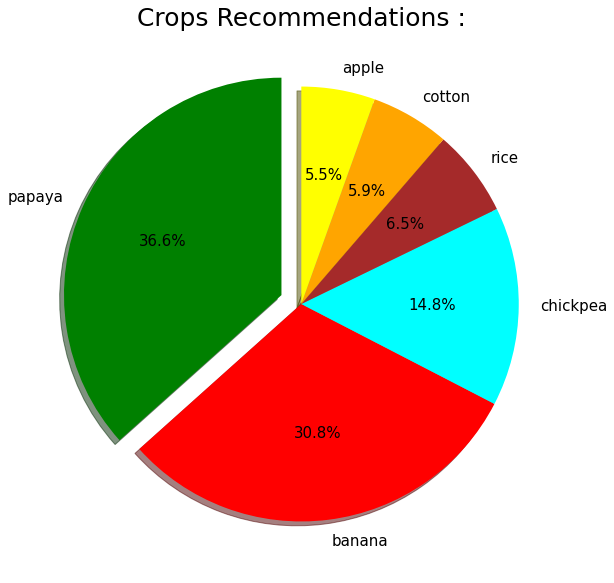

In [49]:
high = pre.predicted_values.nlargest(6)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0,0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange','yellow'])

plt.show()
